# Feature Engineering and Model Selection & Testing

This file tests various different features and model combinations. The conclusions of our tests are at the end of the file



In [1]:
#importing necessary packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

In [2]:
#importing college basketball data

data = pd.read_csv('data/cleaned_data.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
import matplotlib.pyplot as plt

def check_scores(dct, model_type, model, X_train, y_train, X_test, y_test):
    """
    
    This function checks the scores of the training and test data and adds
    them to a dictonary for quick access
    
    
    """

    y_pred = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    cv_score = cross_val_score(model, X_train, y_train, cv=5)
    err = mean_squared_error(y_train, y_pred)
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)

    print("For Training Sets:   ")
    print('Validation Score: {}'.format(np.mean(cv_score)))
    print('Mean error score: {}'.format(err))
    print('Accuracy: {}'.format(accuracy))
    print('Precision: {}'.format(precision))
    
    plot_confusion_matrix(model, X_train, y_train)
    plt.show()
    plt.clf()

    print('--------------------------------------')

    cv_score_test = cross_val_score(model, X_test, y_test, cv=5)
    err_test = mean_squared_error(y_test, y_pred_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)

    print("For Test Sets:   ")
    print('Validation Score: {}'.format(np.mean(cv_score_test)))
    print('Mean error score: {}'.format(err_test))
    print('Accuracy: {}'.format(accuracy_test))
    print('Precision: {}'.format(precision_test))
    
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()
    plt.clf()

    dct['Model Type'].append(model_type)
    dct['CV Score Training'].append(np.mean(cv_score))
    dct['Mean Squared Error Training'].append(err) 
    dct['Accuracy Training'].append(accuracy)
    dct['Precision Training'].append(precision)
    dct['CV Score Test'].append(np.mean(cv_score_test))
    dct['Mean Squared Error Test'].append(err_test) 
    dct['Accuracy Test'].append(accuracy_test)
    dct['Precision Test'].append(precision_test)
    dct['Model'].append(model)

In [4]:
#creating a dict for function to update
models_dct = {'Model Type': [], 'CV Score Training': [], 'Mean Squared Error Training': [], 'Accuracy Training': [],
    'Precision Training': [], 'CV Score Test': [], 'Mean Squared Error Test': [], 'Accuracy Test': [],
    'Precision Test': [], 'Model': []}

## Baseline Model

In this section, we create various baseline models using the scikit learn python package. Our goal is to maximize the accuracy score on the test data and to maximize the validation score on the training data.

In [5]:
#selecting predictor variables based on EDA
sel_cols = ['Rec Rank', 'dbpm', 'obpm', 'bpm', 'stops', 'dporpag', 'porpag', 'ftr', 
'stl_per', 'twoPM', 'FTA', 'FTM', 'ORB_per', 'yr', 'AFFILIATION', 'conf', 'Class']

new_df = data.loc[:, sel_cols].copy()

#enocding categorical variables
new_df_dummies = pd.get_dummies(new_df.loc[:, ['yr', 'AFFILIATION', 'conf']])
new_df.drop(columns=['yr', 'AFFILIATION', 'conf'], inplace=True)

#merging dummies and numeric variables
final_df = pd.concat([new_df, new_df_dummies], axis=1)


In [6]:
#creating training and test data

X = final_df.drop(columns='Class', axis=1)
y = final_df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
from sklearn.impute import SimpleImputer

#filling missing data
si = SimpleImputer()
X_train_imputed = si.fit_transform(X_train)
X_test_imputed = si.transform(X_test)

### Logistic Regression

C:\Users\mikey\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mikey\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

For Training Sets:   
Validation Score: 0.6170403587443947
Mean error score: 0.34080717488789236
Accuracy: 0.6591928251121076
Precision: 0.6355140186915887


C:\Users\mikey\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


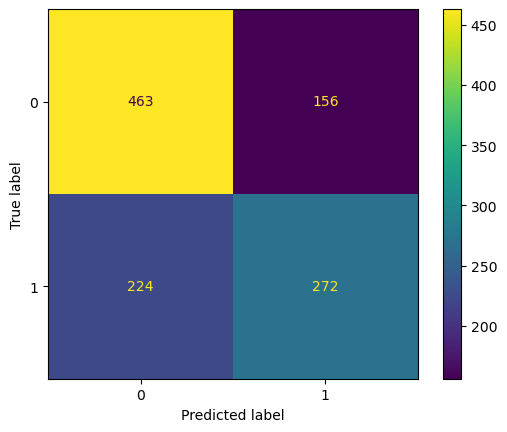

--------------------------------------
For Test Sets:   
Validation Score: 0.5642162162162162
Mean error score: 0.33602150537634407
Accuracy: 0.6639784946236559
Precision: 0.6643835616438356


C:\Users\mikey\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mikey\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

<Figure size 640x480 with 0 Axes>

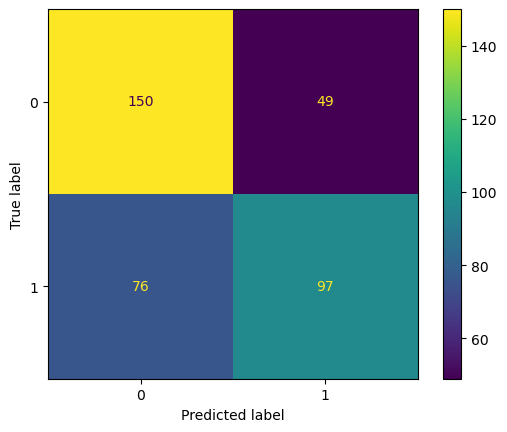

In [8]:
#logistic regression
logreg = LogisticRegression()
logreg.fit(X_train_imputed, y_train)

check_scores(models_dct, 'logreg', logreg, X_train_imputed, y_train, X_test_imputed, y_test)

#### Insights -- Baseline Logsitic Model

The two main metrics we're looking to improves is the cross validations score for the training data and the accuracy score for the testing data. For our baseline we have 0.61 and 0.66 respectively.

### Decision Tree

For Training Sets:   
Validation Score: 0.6286995515695066
Mean error score: 0.0
Accuracy: 1.0
Precision: 1.0


<Figure size 640x480 with 0 Axes>

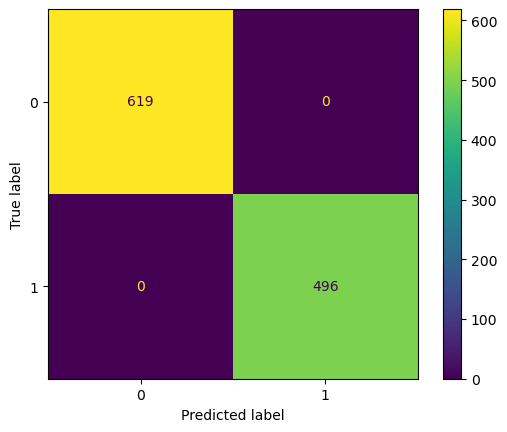

--------------------------------------
For Test Sets:   
Validation Score: 0.5643963963963964
Mean error score: 0.3387096774193548
Accuracy: 0.6612903225806451
Precision: 0.6424242424242425


<Figure size 640x480 with 0 Axes>

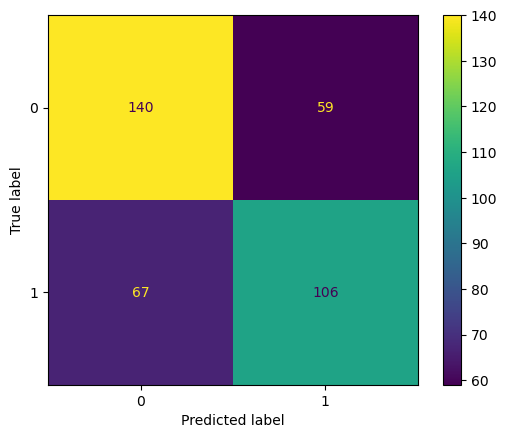

In [9]:
#decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train_imputed, y_train)

check_scores(models_dct, 'dt', dt, X_train_imputed, y_train, X_test_imputed, y_test)

#### Insights -- Decision Tree Classifier

The validation score increased to 0.62 and the accuracy score increased 0.2 points to 0.68. 

### Random Forest

For Training Sets:   
Validation Score: 0.6780269058295965
Mean error score: 0.0
Accuracy: 1.0
Precision: 1.0


<Figure size 640x480 with 0 Axes>

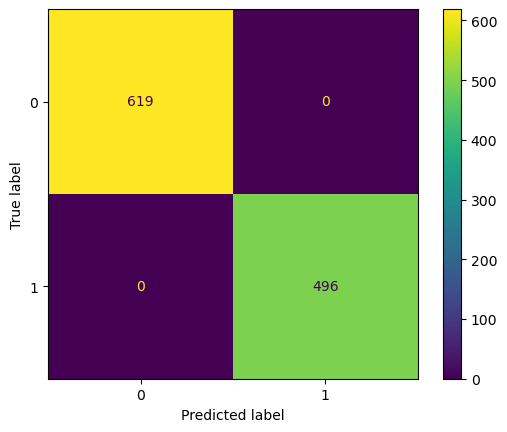

--------------------------------------
For Test Sets:   
Validation Score: 0.6719999999999999
Mean error score: 0.2903225806451613
Accuracy: 0.7096774193548387
Precision: 0.7407407407407407


<Figure size 640x480 with 0 Axes>

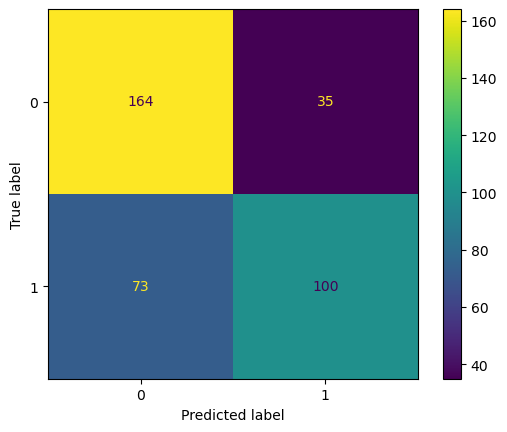

In [10]:
rf = RandomForestClassifier()
rf.fit(X_train_imputed, y_train)

check_scores(models_dct, 'rf', rf, X_train_imputed, y_train, X_test_imputed, y_test)

#### Insights -- Random Forest

The validation score and accuracy score increased substantially. 0.68 and 0.72 respectivelly.

### K Nearest Neighbors

For Training Sets:   
Validation Score: 0.5659192825112107
Mean error score: 0.27533632286995513
Accuracy: 0.7246636771300449
Precision: 0.7095343680709535


<Figure size 640x480 with 0 Axes>

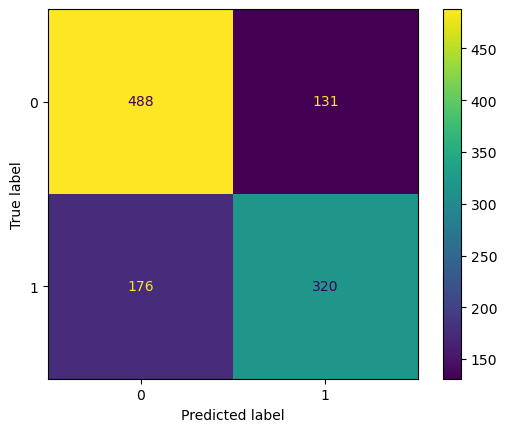

--------------------------------------
For Test Sets:   
Validation Score: 0.5296936936936937
Mean error score: 0.4731182795698925
Accuracy: 0.5268817204301075
Precision: 0.4896551724137931


<Figure size 640x480 with 0 Axes>

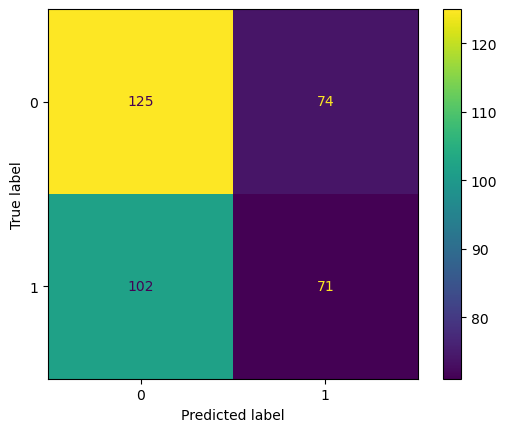

In [11]:
knn = KNeighborsClassifier()
knn.fit(X_train_imputed, y_train)

check_scores(models_dct, 'knn', knn, X_train_imputed, y_train, X_test_imputed, y_test)

#### Insights -- KNN

This model perform comparably worse to the other two models and the baseline model. The valdiation score decreased to 0.56 and the accuracy score decreased to 0.52. 

### Support Vector Classifier

For Training Sets:   
Validation Score: 0.590134529147982
Mean error score: 0.40896860986547084
Accuracy: 0.5910313901345291
Precision: 0.6886792452830188


<Figure size 640x480 with 0 Axes>

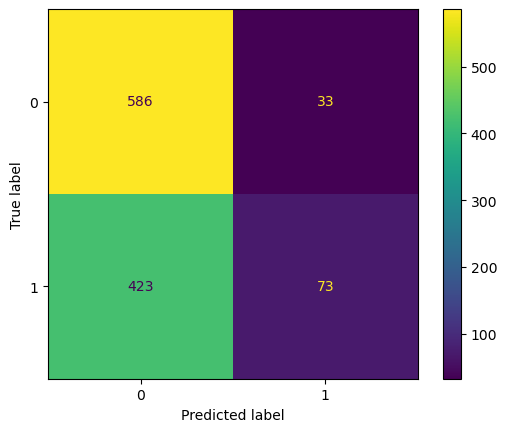

--------------------------------------
For Test Sets:   
Validation Score: 0.5723243243243243
Mean error score: 0.4112903225806452
Accuracy: 0.5887096774193549
Precision: 0.7083333333333334


<Figure size 640x480 with 0 Axes>

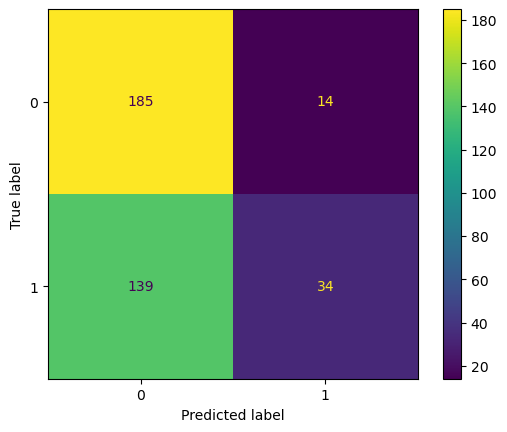

In [12]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_imputed, y_train)

check_scores(models_dct, 'svc', svc, X_train_imputed, y_train, X_test_imputed, y_test)

#### Insights -- SVC

The validation score is 0.59 and the accuracy score is 0.58. This perform terrible compared to the other models.

### Extra Trees Classifier

For Training Sets:   
Validation Score: 0.6798206278026907
Mean error score: 0.0
Accuracy: 1.0
Precision: 1.0


<Figure size 640x480 with 0 Axes>

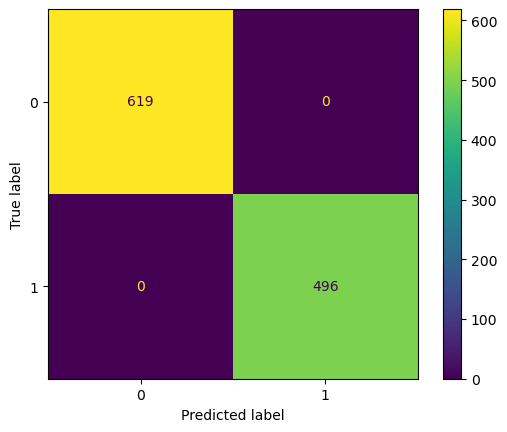

--------------------------------------
For Test Sets:   
Validation Score: 0.6717477477477477
Mean error score: 0.3118279569892473
Accuracy: 0.6881720430107527
Precision: 0.696551724137931


<Figure size 640x480 with 0 Axes>

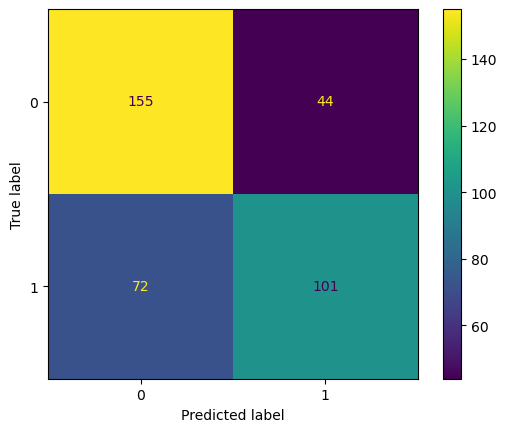

In [13]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier()
et.fit(X_train_imputed, y_train)

check_scores(models_dct, 'et', et, X_train_imputed, y_train, X_test_imputed, y_test)

#### Insights -- ET

The performance is similar to decision trees with 0.67 and 0.69 validation and accuracy scores respectively.

### Gradient Boosting Classifier

For Training Sets:   
Validation Score: 0.7022421524663678
Mean error score: 0.16771300448430493
Accuracy: 0.8322869955156951
Precision: 0.9076517150395779


<Figure size 640x480 with 0 Axes>

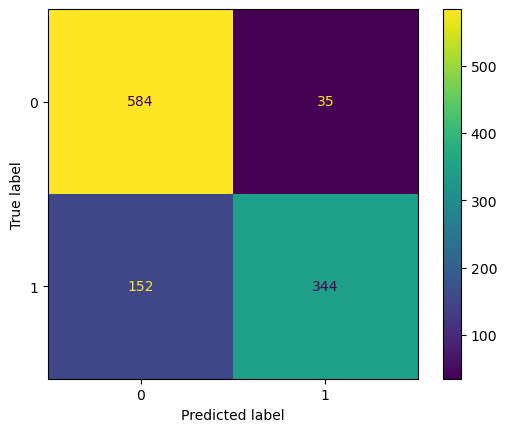

--------------------------------------
For Test Sets:   
Validation Score: 0.6962162162162162
Mean error score: 0.25806451612903225
Accuracy: 0.7419354838709677
Precision: 0.8031496062992126


<Figure size 640x480 with 0 Axes>

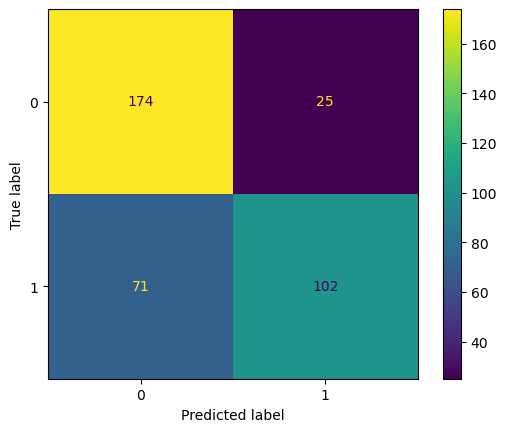

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train_imputed, y_train)

check_scores(models_dct, 'gbc', gbc, X_train_imputed, y_train, X_test_imputed, y_test)

#### Insights -- GBC

Some of our best results yet! 0.7 validation and 0.74 accuracy.

## Analysis of Baseline Models

In [15]:
#viewing the top accuracy scores
pd.DataFrame(models_dct).sort_values(by='Accuracy Test', ascending=False)

,Model Type,CV Score Training,Mean Squared Error Training,Accuracy Training,Precision Training,CV Score Test,Mean Squared Error Test,Accuracy Test,Precision Test,Model
6,gbc,0.702242,0.167713,0.832287,0.907652,0.680180,0.258065,0.741935,0.803150,([DecisionTreeRegressor(criterion='friedman_ms...
2,rf,0.684305,0.000000,1.000000,1.000000,0.650486,0.293011,0.706989,0.742424,"(DecisionTreeClassifier(max_features='auto', r..."
5,et,0.686996,0.000000,1.000000,1.000000,0.655604,0.306452,0.693548,0.700680,"(ExtraTreeClassifier(random_state=625226166), ..."
0,logreg,0.617040,0.340807,0.659193,0.635514,0.564216,0.336022,0.663978,0.664384,LogisticRegression()
1,dt,0.630493,0.000000,1.000000,1.000000,0.564577,0.336022,0.663978,0.646341,DecisionTreeClassifier()
4,svc,0.590135,0.408969,0.591031,0.688679,0.572324,0.411290,0.588710,0.708333,SVC()
3,knn,0.565919,0.275336,0.724664,0.709534,0.529694,0.473118,0.526882,0.489655,KNeighborsClassifier()


In [16]:
#viewing the top cv scores
pd.DataFrame(models_dct).sort_values(by='CV Score Training', ascending=False)

,Model Type,CV Score Training,Mean Squared Error Training,Accuracy Training,Precision Training,CV Score Test,Mean Squared Error Test,Accuracy Test,Precision Test,Model
6,gbc,0.702242,0.167713,0.832287,0.907652,0.680180,0.258065,0.741935,0.803150,([DecisionTreeRegressor(criterion='friedman_ms...
5,et,0.686996,0.000000,1.000000,1.000000,0.655604,0.306452,0.693548,0.700680,"(ExtraTreeClassifier(random_state=625226166), ..."
2,rf,0.684305,0.000000,1.000000,1.000000,0.650486,0.293011,0.706989,0.742424,"(DecisionTreeClassifier(max_features='auto', r..."
1,dt,0.630493,0.000000,1.000000,1.000000,0.564577,0.336022,0.663978,0.646341,DecisionTreeClassifier()
0,logreg,0.617040,0.340807,0.659193,0.635514,0.564216,0.336022,0.663978,0.664384,LogisticRegression()
4,svc,0.590135,0.408969,0.591031,0.688679,0.572324,0.411290,0.588710,0.708333,SVC()
3,knn,0.565919,0.275336,0.724664,0.709534,0.529694,0.473118,0.526882,0.489655,KNeighborsClassifier()


### Insights -- Baseline Models

The top three models by both accuracy and cross validation are Gradient Boosting, Random Forest and Extra Trees in that order.

## Stacking Model

In this section we'll stack the best baseline models to see if there is improvement in accuracy and validation scores

For Training Sets:   
Validation Score: 0.7147982062780269
Mean error score: 0.0026905829596412557
Accuracy: 0.9973094170403587
Precision: 0.9939879759519038


<Figure size 640x480 with 0 Axes>

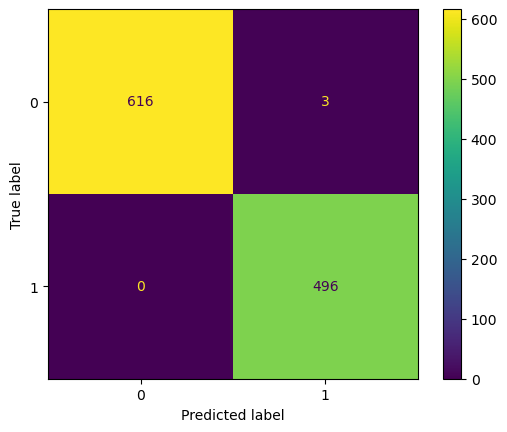

--------------------------------------
For Test Sets:   
Validation Score: 0.6986666666666667
Mean error score: 0.2446236559139785
Accuracy: 0.7553763440860215
Precision: 0.7928571428571428


<Figure size 640x480 with 0 Axes>

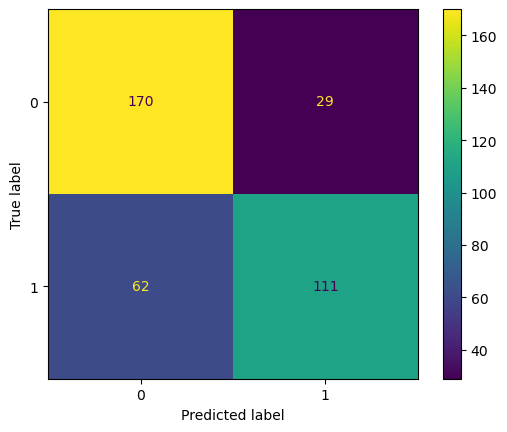

In [15]:
from sklearn.ensemble import StackingClassifier

estimator_list = [('gbc', gbc), ('rf', rf), ('et', et)]

stacked = StackingClassifier(estimators=estimator_list, final_estimator=LogisticRegression())

stacked.fit(X_train_imputed, y_train)

check_scores(models_dct, 'stacked', stacked, X_train_imputed, y_train, X_test_imputed, y_test)

### Insights -- Stacked

Using the stacking classifier increased our results by minimal amounts.

## ADA Boosting

In this section, we'll use AdaBoosterClassifier on our best three models to see if there's improvement

### Random Forest Boosted

For Training Sets:   
Validation Score: 0.6753363228699552
Mean error score: 0.0
Accuracy: 1.0
Precision: 1.0


<Figure size 640x480 with 0 Axes>

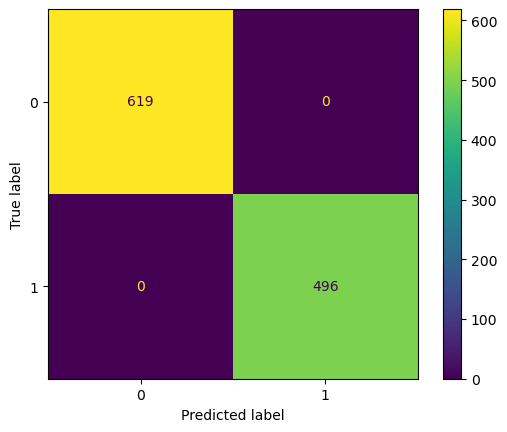

--------------------------------------
For Test Sets:   
Validation Score: 0.6504504504504505
Mean error score: 0.2768817204301075
Accuracy: 0.7231182795698925
Precision: 0.7464788732394366


<Figure size 640x480 with 0 Axes>

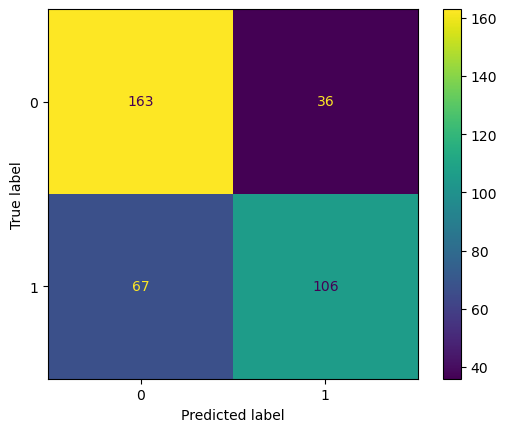

In [16]:
from sklearn.ensemble import AdaBoostClassifier

ada_rf = AdaBoostClassifier(base_estimator=RandomForestClassifier())

ada_rf.fit(X_train_imputed, y_train)

check_scores(models_dct, 'ada_rf', ada_rf, X_train_imputed, y_train, X_test_imputed, y_test)

### Gradient Boosting Classifer boosted

For Training Sets:   
Validation Score: 0.7165919282511211
Mean error score: 0.0
Accuracy: 1.0
Precision: 1.0


<Figure size 640x480 with 0 Axes>

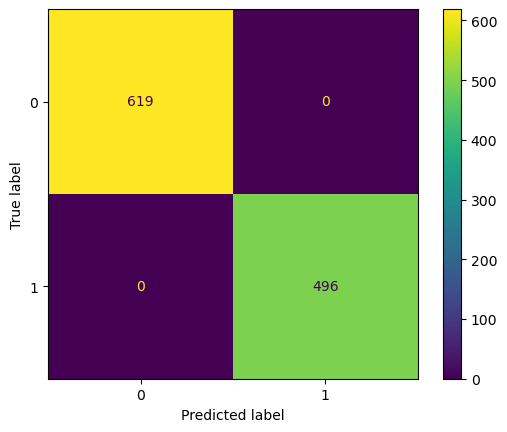

--------------------------------------
For Test Sets:   
Validation Score: 0.6988828828828829
Mean error score: 0.24193548387096775
Accuracy: 0.7580645161290323
Precision: 0.7643312101910829


<Figure size 640x480 with 0 Axes>

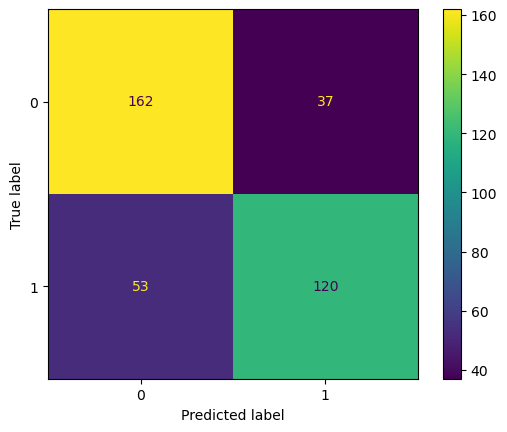

In [17]:
ada_gbc = AdaBoostClassifier(base_estimator=GradientBoostingClassifier())

ada_gbc.fit(X_train_imputed, y_train)

check_scores(models_dct, 'ada_gbc', ada_gbc, X_train_imputed, y_train, X_test_imputed, y_test)

### Extra Trees Boosted

For Training Sets:   
Validation Score: 0.6825112107623317
Mean error score: 0.0
Accuracy: 1.0
Precision: 1.0


<Figure size 640x480 with 0 Axes>

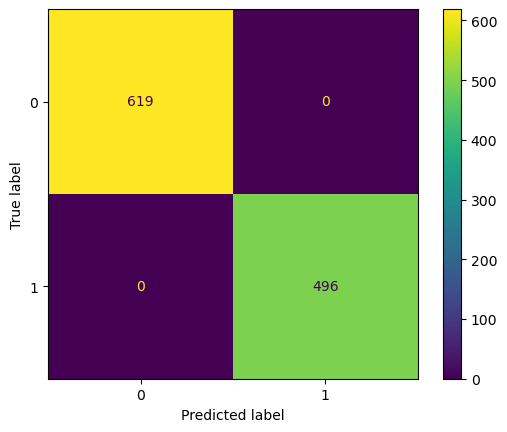

--------------------------------------
For Test Sets:   
Validation Score: 0.6663783783783783
Mean error score: 0.30376344086021506
Accuracy: 0.696236559139785
Precision: 0.7083333333333334


<Figure size 640x480 with 0 Axes>

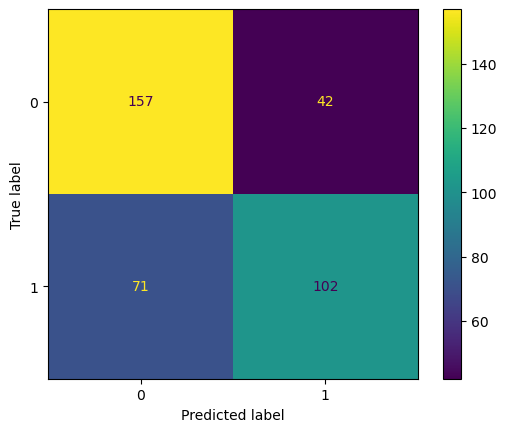

In [ ]:
ada_et = AdaBoostClassifier(base_estimator=ExtraTreesClassifier())

ada_et.fit(X_train_imputed, y_train)

check_scores(models_dct, 'ada_et', ada_et, X_train_imputed, y_train, X_test_imputed, y_test)

In [ ]:
pd.DataFrame(models_dct).sort_values(by='Accuracy Test', ascending=False)

,Model Type,CV Score Training,Mean Squared Error Training,Accuracy Training,Precision Training,CV Score Test,Mean Squared Error Test,Accuracy Test,Precision Test,Model
7,stacked,0.706726,0.000000,1.000000,1.000000,0.687928,0.239247,0.760753,0.787671,"StackingClassifier(estimators=[('gbc', Gradien..."
9,ada_gbc,0.713901,0.000000,1.000000,1.000000,0.706847,0.241935,0.758065,0.764331,(([DecisionTreeRegressor(criterion='friedman_m...
6,gbc,0.704036,0.167713,0.832287,0.907652,0.685550,0.255376,0.744624,0.809524,([DecisionTreeRegressor(criterion='friedman_ms...
8,ada_rf,0.677130,0.000000,1.000000,1.000000,0.682703,0.287634,0.712366,0.746269,"((DecisionTreeClassifier(max_features='auto', ..."
2,rf,0.681614,0.000000,1.000000,1.000000,0.663820,0.290323,0.709677,0.744361,"(DecisionTreeClassifier(max_features='auto', r..."
5,et,0.669058,0.000000,1.000000,1.000000,0.644973,0.303763,0.696237,0.700000,"(ExtraTreeClassifier(random_state=88764420), E..."
10,ada_et,0.682511,0.000000,1.000000,1.000000,0.666378,0.303763,0.696237,0.708333,((ExtraTreeClassifier(random_state=1085198554)...
1,dt,0.643946,0.000000,1.000000,1.000000,0.591207,0.330645,0.669355,0.648810,DecisionTreeClassifier()
0,logreg,0.617040,0.340807,0.659193,0.635514,0.564216,0.336022,0.663978,0.664384,LogisticRegression()
4,svc,0.590135,0.408969,0.591031,0.688679,0.572324,0.411290,0.588710,0.708333,SVC()


In [ ]:
pd.DataFrame(models_dct).sort_values(by='CV Score Training', ascending=False)

,Model Type,CV Score Training,Mean Squared Error Training,Accuracy Training,Precision Training,CV Score Test,Mean Squared Error Test,Accuracy Test,Precision Test,Model
9,ada_gbc,0.713901,0.000000,1.000000,1.000000,0.706847,0.241935,0.758065,0.764331,(([DecisionTreeRegressor(criterion='friedman_m...
7,stacked,0.706726,0.000000,1.000000,1.000000,0.687928,0.239247,0.760753,0.787671,"StackingClassifier(estimators=[('gbc', Gradien..."
6,gbc,0.704036,0.167713,0.832287,0.907652,0.685550,0.255376,0.744624,0.809524,([DecisionTreeRegressor(criterion='friedman_ms...
10,ada_et,0.682511,0.000000,1.000000,1.000000,0.666378,0.303763,0.696237,0.708333,((ExtraTreeClassifier(random_state=1085198554)...
2,rf,0.681614,0.000000,1.000000,1.000000,0.663820,0.290323,0.709677,0.744361,"(DecisionTreeClassifier(max_features='auto', r..."
8,ada_rf,0.677130,0.000000,1.000000,1.000000,0.682703,0.287634,0.712366,0.746269,"((DecisionTreeClassifier(max_features='auto', ..."
5,et,0.669058,0.000000,1.000000,1.000000,0.644973,0.303763,0.696237,0.700000,"(ExtraTreeClassifier(random_state=88764420), E..."
1,dt,0.643946,0.000000,1.000000,1.000000,0.591207,0.330645,0.669355,0.648810,DecisionTreeClassifier()
0,logreg,0.617040,0.340807,0.659193,0.635514,0.564216,0.336022,0.663978,0.664384,LogisticRegression()
4,svc,0.590135,0.408969,0.591031,0.688679,0.572324,0.411290,0.588710,0.708333,SVC()


#### Insights

ExtraTrees and Gradient Booster had imporvement in our key metrics when we used the AdaBoosterClassifier. 

# Preprocessing the Best Models with Pipelines

In this section, we do feature engineering by using pipelines to streamline our process. We focus on standarizing the data and one hot encoding the categorical data

In [ ]:
#importing necessary modules
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
#training and testing data

sel_cols = ['Rec Rank', 'dbpm', 'obpm', 'bpm', 'stops', 'dporpag', 'porpag', 'ftr', 
'stl_per', 'FTA', 'ORB_per', 'yr', 'AFFILIATION', 'conf', 'Class']

df = data.loc[:, sel_cols].copy()

X = df.drop(columns='Class', axis=1)
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#pipelines and column transformer

numeric_pipeline = Pipeline([('numimputer', SimpleImputer(strategy = 'mean')), ('numnorm', StandardScaler())])
nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown='ignore')), 
    ('onehotscale', StandardScaler())])

num_cols = X_train.select_dtypes(['int', 'float']).columns
ct = ColumnTransformer([('one_hot', nominal_pipeline, ['yr', 'AFFILIATION', 'conf']),
('num_transform', numeric_pipeline, num_cols)])


### Random Forest

For Training Sets:   
Validation Score: 0.6771300448430494
Mean error score: 0.0
Accuracy: 1.0
Precision: 1.0


<Figure size 640x480 with 0 Axes>

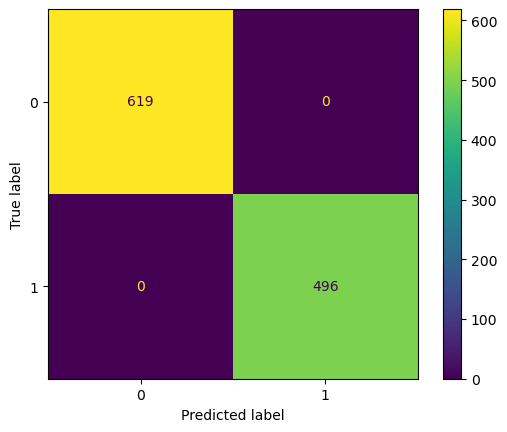

--------------------------------------
For Test Sets:   
Validation Score: 0.6666306306306307
Mean error score: 0.27956989247311825
Accuracy: 0.7204301075268817
Precision: 0.776


<Figure size 640x480 with 0 Axes>

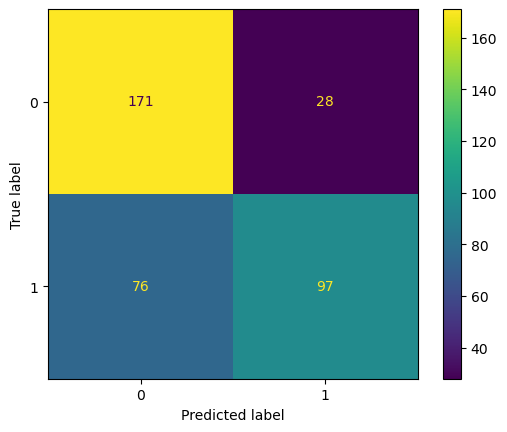

In [ ]:
pipe_rf = Pipeline([('preproces', ct), ('model', RandomForestClassifier())])
pipe_rf.fit(X_train, y_train)

check_scores(models_dct, 'pipe_rf', pipe_rf, X_train, y_train, X_test, y_test)



For Training Sets:   
Validation Score: 0.7022421524663678
Mean error score: 0.17040358744394618
Accuracy: 0.8295964125560538
Precision: 0.8984375


<Figure size 640x480 with 0 Axes>

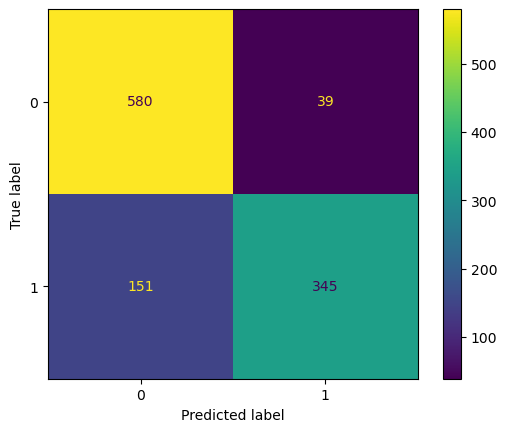

--------------------------------------
For Test Sets:   
Validation Score: 0.690918918918919
Mean error score: 0.24193548387096775
Accuracy: 0.7580645161290323
Precision: 0.8373983739837398


<Figure size 640x480 with 0 Axes>

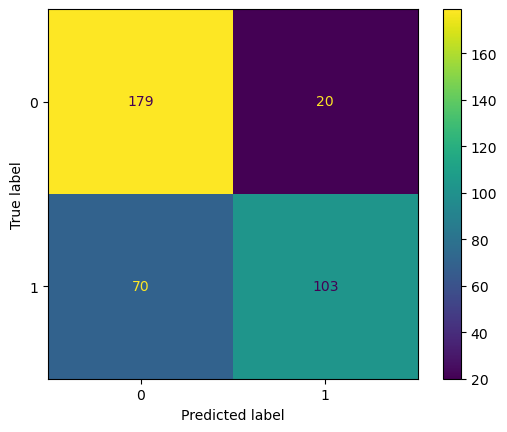

In [ ]:
pipe_gbc = Pipeline([('preproces', ct), ('model', GradientBoostingClassifier())])
pipe_gbc.fit(X_train, y_train)

check_scores(models_dct, 'pipe_gbc', pipe_gbc, X_train, y_train, X_test, y_test)

For Training Sets:   
Validation Score: 0.6744394618834081
Mean error score: 0.0
Accuracy: 1.0
Precision: 1.0


<Figure size 640x480 with 0 Axes>

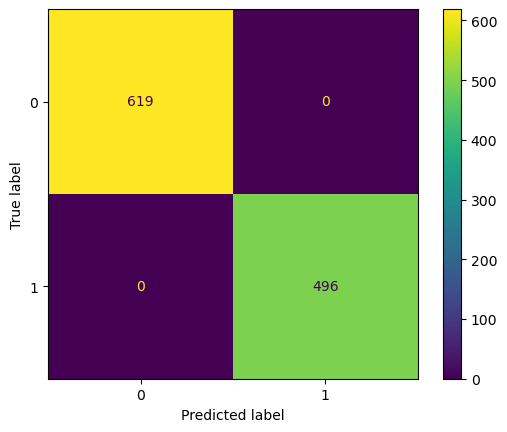

--------------------------------------
For Test Sets:   
Validation Score: 0.6611531531531533
Mean error score: 0.2849462365591398
Accuracy: 0.7150537634408602
Precision: 0.710691823899371


<Figure size 640x480 with 0 Axes>

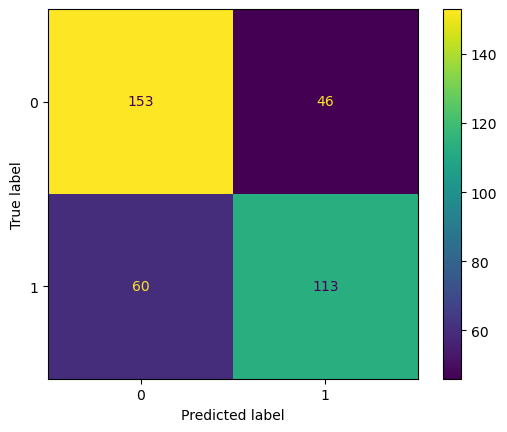

In [ ]:
pipe_et = Pipeline([('preproces', ct), ('model', ExtraTreesClassifier())])
pipe_et.fit(X_train, y_train)

check_scores(models_dct, 'pipe_et', pipe_et, X_train, y_train, X_test, y_test)

## Using AdaBoostClassifier with Pipelines

For Training Sets:   
Validation Score: 0.7255605381165919
Mean error score: 0.0
Accuracy: 1.0
Precision: 1.0


<Figure size 640x480 with 0 Axes>

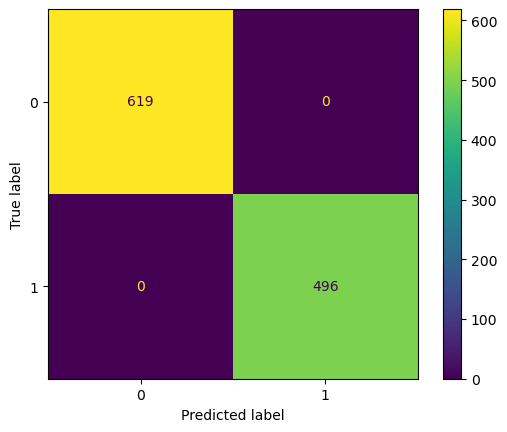

--------------------------------------
For Test Sets:   
Validation Score: 0.6692252252252252
Mean error score: 0.18548387096774194
Accuracy: 0.8145161290322581
Precision: 0.8376623376623377


<Figure size 640x480 with 0 Axes>

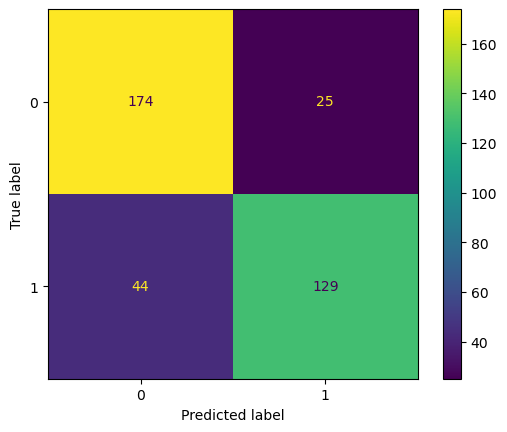

In [ ]:
pipe_ada_gbc = Pipeline([('preproces', ct), ('model', AdaBoostClassifier(base_estimator=GradientBoostingClassifier()))])
pipe_ada_gbc.fit(X_train, y_train)

check_scores(models_dct, 'pipe_ada_gbc', pipe_ada_gbc, X_train, y_train, X_test, y_test)

For Training Sets:   
Validation Score: 0.684304932735426
Mean error score: 0.0
Accuracy: 1.0
Precision: 1.0


<Figure size 640x480 with 0 Axes>

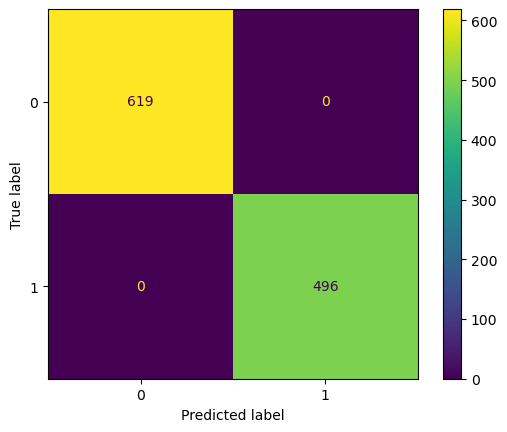

--------------------------------------
For Test Sets:   
Validation Score: 0.6692972972972973
Mean error score: 0.28225806451612906
Accuracy: 0.717741935483871
Precision: 0.753731343283582


<Figure size 640x480 with 0 Axes>

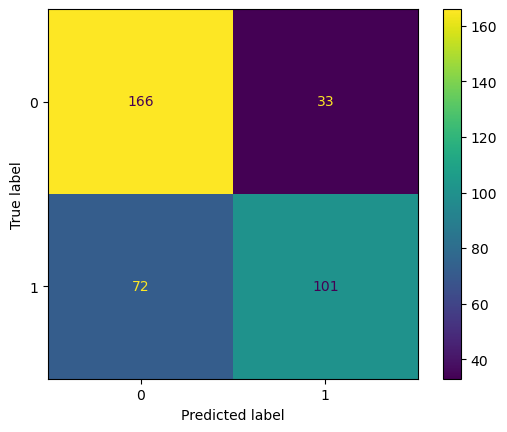

In [ ]:
pipe_ada_rf = Pipeline([('preproces', ct), ('model', AdaBoostClassifier(base_estimator=RandomForestClassifier()))])
pipe_ada_rf.fit(X_train, y_train)

check_scores(models_dct, 'pipe_ada_rf', pipe_ada_rf, X_train, y_train, X_test, y_test)

For Training Sets:   
Validation Score: 0.6798206278026906
Mean error score: 0.0
Accuracy: 1.0
Precision: 1.0


<Figure size 640x480 with 0 Axes>

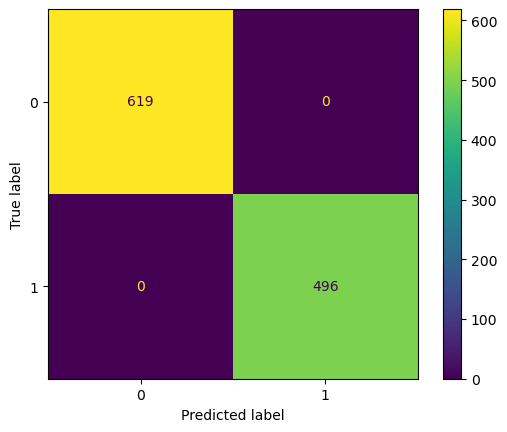

--------------------------------------
For Test Sets:   
Validation Score: 0.6692972972972973
Mean error score: 0.28763440860215056
Accuracy: 0.7123655913978495
Precision: 0.7115384615384616


<Figure size 640x480 with 0 Axes>

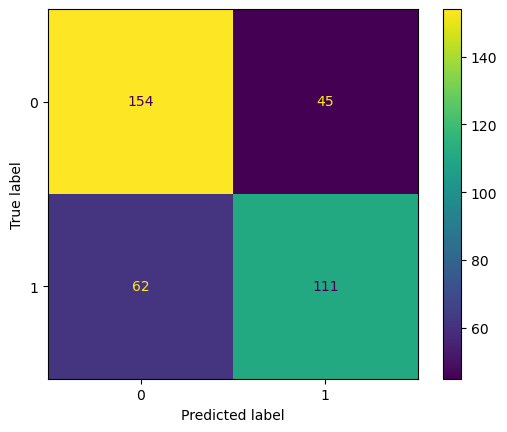

In [ ]:
pipe_ada_et = Pipeline([('preproces', ct), ('model', AdaBoostClassifier(base_estimator=ExtraTreesClassifier()))])
pipe_ada_et.fit(X_train, y_train)

check_scores(models_dct, 'pipe_ada_et', pipe_ada_et, X_train, y_train, X_test, y_test)

# Hyper Parameter Tuning

In this section, we optimize the hyper parameters of gradient booster, extra trees, and random forest models.

## Gradient Boosting

In [ ]:
numeric_pipeline = Pipeline([('numimputer', SimpleImputer(strategy = 'mean')), ('numnorm', StandardScaler())])
nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown='ignore')), 
    ('onehotscale', StandardScaler())])

num_cols = X_train.select_dtypes(['int', 'float']).columns
ct = ColumnTransformer([('one_hot', nominal_pipeline, ['yr', 'AFFILIATION', 'conf']),
('num_transform', numeric_pipeline, num_cols)])



In [34]:
#do not run this cell (est. time: 73 mins)
from sklearn.model_selection import GridSearchCV

pipe_gbc = Pipeline([('preprocess', ct), ('model', GradientBoostingClassifier())])

params = {'preprocess__num_transform__numimputer__strategy':['mean', 'median'],
'model__learning_rate':[0.0001, 0.001, 0.01, 0.1, .5, 1], 'model__n_estimators': [50, 100, 150,200,300],
'model__subsample':[0.1, 0.5, 1, 3], 'model__max_depth': [3, 5, 9, 12, 15]}

grid_gbc = GridSearchCV(param_grid=params, estimator=pipe_gbc)

grid_gbc.fit(X_train, y_train)


C:\Users\mikey\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mikey\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mikey\anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\mikey\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\mikey\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_gb.py", line 251, in _check_params
    raise ValueError("subsample must be in (0,1] but "
ValueError: subsample must be in (0,1] but was 3

  warnings.warn("Estimat

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('one_hot',
                                                                         Pipeline(steps=[('onehotimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotenc',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False)),
                                                                                         ('onehotscale',
                                                                                          StandardScaler())]),
                                                       

For Training Sets:   
Validation Score: 0.7659192825112108
Mean error score: 0.0
Accuracy: 1.0
Precision: 1.0


<Figure size 640x480 with 0 Axes>

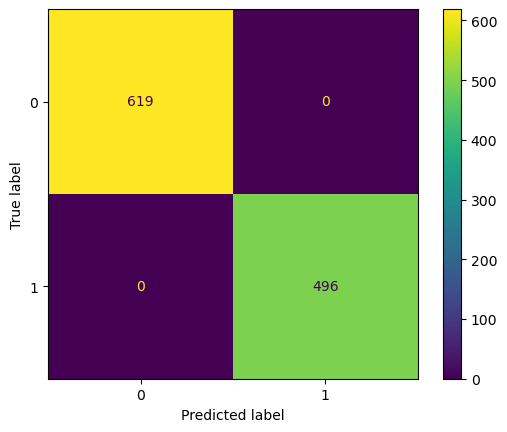

--------------------------------------
For Test Sets:   
Validation Score: 0.6344864864864865
Mean error score: 0.1478494623655914
Accuracy: 0.8521505376344086
Precision: 0.8831168831168831


<Figure size 640x480 with 0 Axes>

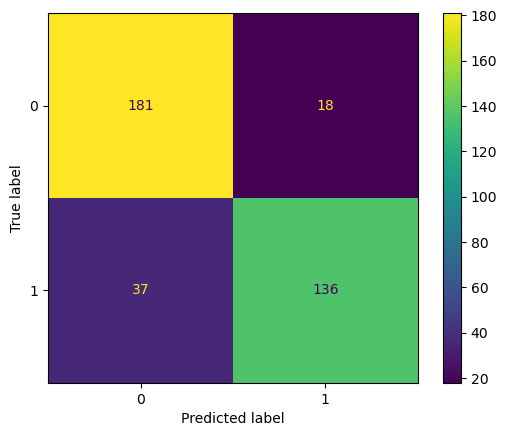

In [35]:
check_scores(models_dct, 'grid_gbc', grid_gbc.best_estimator_, X_train, y_train, X_test, y_test)

In [38]:
#saving models to csv file
gbc_csv = pd.DataFrame(grid_gbc.cv_results_).to_csv('gbc_entries.csv')

In [39]:
#parameters of best estimator
grid_gbc.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('one_hot',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotscale',
                                                                   StandardScaler())]),
                                                  ['yr', 'AFFILIATION',
                                                   'conf']),
                                                 ('num_transform',
                                                  Pipeline(ste

### Extra Trees

For Training Sets:   
Validation Score: 0.7076233183856502
Mean error score: 0.0
Accuracy: 1.0
Precision: 1.0


<Figure size 640x480 with 0 Axes>

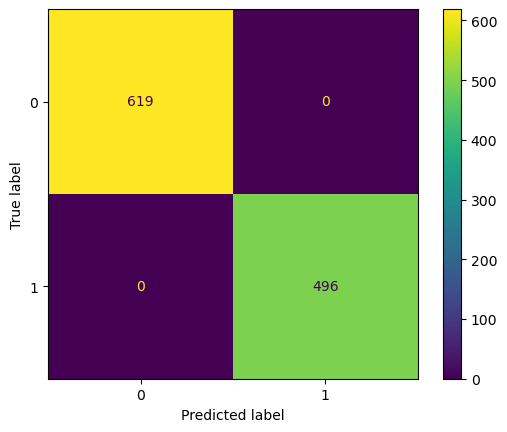

--------------------------------------
For Test Sets:   
Validation Score: 0.6611531531531532
Mean error score: 0.271505376344086
Accuracy: 0.728494623655914
Precision: 0.7337662337662337


<Figure size 640x480 with 0 Axes>

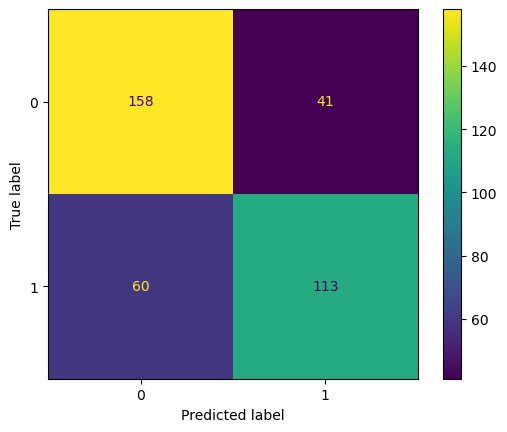

In [41]:
#do not run cell (est time: 81 mins)
pipe_et = Pipeline([('preprocess', ct), ('model', ExtraTreesClassifier())])

params = {'preprocess__num_transform__numimputer__strategy':['mean', 'median'],
'model__n_estimators': [50, 100, 150,200,300], 'model__max_depth': [None, 3, 5, 9, 12, 15],
'model__max_features':[None, 'auto', 'sqrt', 'log2'], 'model__bootstrap': [True, False]}

grid_et = GridSearchCV(param_grid=params, estimator=pipe_et)

grid_et.fit(X_train, y_train)

In [44]:
#saving estimators to csv file
grid_et_csv = pd.DataFrame(grid_et.cv_results_).to_csv('grid_et_csv.csv')

In [45]:
#parameters of best extra trees classifier
grid_et.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('one_hot',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotscale',
                                                                   StandardScaler())]),
                                                  ['yr', 'AFFILIATION',
                                                   'conf']),
                                                 ('num_transform',
                                                  Pipeline(ste

For Training Sets:   
Validation Score: 0.7031390134529147
Mean error score: 0.0
Accuracy: 1.0
Precision: 1.0


<Figure size 640x480 with 0 Axes>

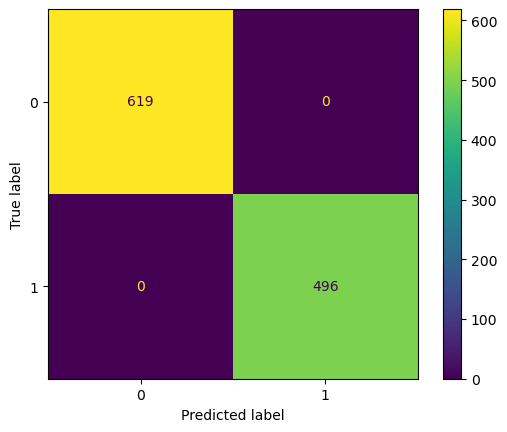

--------------------------------------
For Test Sets:   
Validation Score: 0.6666306306306307
Mean error score: 0.271505376344086
Accuracy: 0.728494623655914
Precision: 0.7337662337662337


<Figure size 640x480 with 0 Axes>

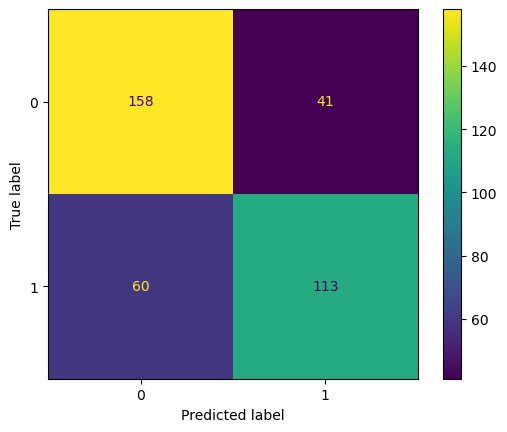

In [42]:
check_scores(models_dct, 'grid_et', grid_et.best_estimator_, X_train, y_train, X_test, y_test)

### Random Forest Classifier

In [ ]:
#do not run cell (est. time: 78 mins)
pipe_rf = Pipeline([('preprocess', ct), ('model', RandomForestClassifier())])

params = {'preprocess__num_transform__numimputer__strategy':['mean', 'median'],
'model__n_estimators': [100, 150,200,250, 300, 400], 'model__max_depth': [5, 6, 7, 8, 10, 15, 20],
'model__bootstrap': [True, False], 'model__n_jobs': [-1,1,2,3]}

grid_rf = GridSearchCV(param_grid=params, estimator=pipe_rf)

grid_rf.fit(X_train, y_train)

check_scores(models_dct, 'grid_rf', grid_rf, X_train, y_train, X_test, y_test)

In [ ]:
check_scores(models_dct, 'grid_rf', grid_rf.best_estimator_, X_train, y_train, X_test, y_test)

#### Best Models:

##### RandomForestClassifier(criterion='entropy', max_depth=10, bootstrap=False, n_estimators=100, n_jobs=3)

##### GradientBoostingClassifier(learning_rate=1, max_depth=9, n_estimators=300, subsample=1))

#####  ExtraTreesClassifier(bootstrap=True, max_features=None, n_estimators=200)



## Ada Boosting the Optimize models

In [ ]:
pipe_ada_gbc_opt = Pipeline([('preproces', ct), ('model', AdaBoostClassifier(base_estimator=GradientBoostingClassifier(learning_rate=1, max_depth=9, n_estimators=300, subsample=1)))])

pipe_ada_gbc_opt.fit(X_train, y_train)

check_scores(models_dct, 'pipe_ada_gbc_opt', pipe_ada_gbc_opt, X_train, y_train, X_test, y_test)

For Training Sets:   
Validation Score: 0.7381165919282511
Mean error score: 0.0
Accuracy: 1.0
Precision: 1.0


<Figure size 640x480 with 0 Axes>

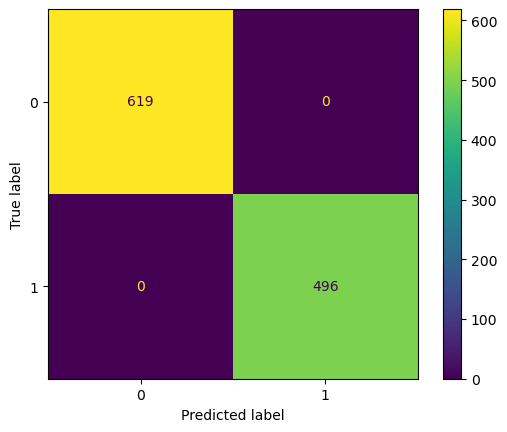

--------------------------------------
For Test Sets:   
Validation Score: 0.7016216216216217
Mean error score: 0.20698924731182797
Accuracy: 0.793010752688172
Precision: 0.82


<Figure size 640x480 with 0 Axes>

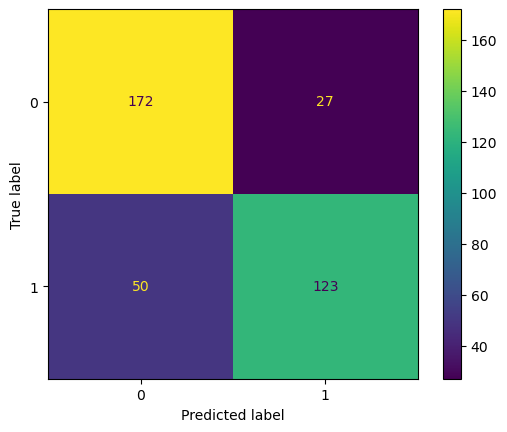

In [ ]:
pipe_ada_rf_opt = Pipeline([('preproces', ct), ('model', AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy', max_depth=10, bootstrap=False, n_estimators=100, n_jobs=3)))])
pipe_ada_rf_opt.fit(X_train, y_train)

check_scores(models_dct, 'pipe_ada_rf_opt', pipe_ada_rf_opt, X_train, y_train, X_test, y_test)

For Training Sets:   
Validation Score: 0.7013452914798206
Mean error score: 0.0
Accuracy: 1.0
Precision: 1.0


<Figure size 640x480 with 0 Axes>

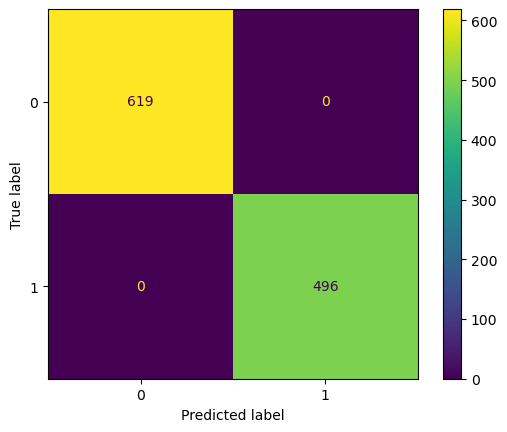

--------------------------------------
For Test Sets:   
Validation Score: 0.6612252252252253
Mean error score: 0.2768817204301075
Accuracy: 0.7231182795698925
Precision: 0.7397260273972602


<Figure size 640x480 with 0 Axes>

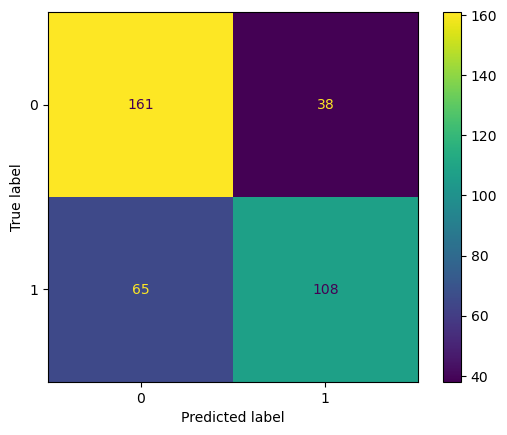

In [ ]:
pipe_ada_et_opt = Pipeline([('preproces', ct), ('model', AdaBoostClassifier(base_estimator=ExtraTreesClassifier(bootstrap=True, max_features=None, n_estimators=200)))])
pipe_ada_et_opt.fit(X_train, y_train)

check_scores(models_dct, 'pipe_ada_et_opt', pipe_ada_et_opt, X_train, y_train, X_test, y_test)

### Insights -- Gradient Booster Optimized is the best model so far with 85% accuracy and 78 % validation

This will be the model we'll use for deployment